In [5]:
import numpy as np 
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import tensorflow as tf

os.environ["CUDA_VISIBLE_DEVICES"] = "5"
config=tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True   #不全部占满显存, 按需分配
sess=tf.compat.v1.Session(config=config)     

In [6]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(units=64,activation='relu',input_shape=(13,)))
    model.add(layers.Dense(units=64,activation='relu'))
    #回归问题的输出问题不需要激活函数，默认就为恒等函数
    model.add(layers.Dense(units=1))
    #损失函数使用均方误差 监控指标使用平均绝对误差
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

    return model

In [7]:
#准备训练数据
#(404, 13) (404,)   (102, 13) (102,)
#每个样本中有13个数值特征，比如人均犯罪率、每个住宅的平均房间数等
#目标是房屋价格的中位数，单位是千美元
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

#将数据标准化
#减去特征平均值，再除以标准差，得到特征平均值为0，标准差为1
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

#测试数据必须以训练数据的均值和标准差进行变换，这样两者的变换才一致
test_data-=mean
test_data/=std

#由于训练样本过少，采用K折交叉验证
k=4
num_val_samples=len(train_data)//k
num_epochs=500
all_val_mae_histories=[]
all_scores=[]

第几折：0
Epoch 1/500
303/303 [==============================] - 3s 5ms/step - loss: 228.9237 - mae: 11.4645 - val_loss: 42.3439 - val_mae: 4.2008
Epoch 2/500
303/303 [==============================] - 1s 4ms/step - loss: 32.2029 - mae: 3.8696 - val_loss: 21.9490 - val_mae: 2.8799
Epoch 3/500
303/303 [==============================] - 1s 4ms/step - loss: 21.9784 - mae: 3.0732 - val_loss: 16.8887 - val_mae: 2.5421
Epoch 4/500
303/303 [==============================] - 2s 6ms/step - loss: 18.6222 - mae: 2.8350 - val_loss: 14.9924 - val_mae: 2.3433
Epoch 5/500
303/303 [==============================] - 1s 3ms/step - loss: 16.3329 - mae: 2.6512 - val_loss: 13.8093 - val_mae: 2.4017
Epoch 6/500
303/303 [==============================] - 1s 4ms/step - loss: 15.2959 - mae: 2.5618 - val_loss: 12.3353 - val_mae: 2.2052
Epoch 7/500
303/303 [==============================] - 1s 3ms/step - loss: 13.9916 - mae: 2.4910 - val_loss: 11.6523 - val_mae: 2.1834
Epoch 8/500
303/303 [==========================

Epoch 62/500
303/303 [==============================] - 1s 4ms/step - loss: 5.3041 - mae: 1.5312 - val_loss: 9.9876 - val_mae: 2.5086
Epoch 63/500
303/303 [==============================] - 1s 3ms/step - loss: 5.5292 - mae: 1.5781 - val_loss: 8.5382 - val_mae: 2.1343
Epoch 64/500
303/303 [==============================] - 1s 4ms/step - loss: 4.9103 - mae: 1.4926 - val_loss: 9.0841 - val_mae: 2.1026
Epoch 65/500
303/303 [==============================] - 1s 4ms/step - loss: 5.2952 - mae: 1.5311 - val_loss: 8.1491 - val_mae: 2.0133
Epoch 66/500
303/303 [==============================] - 2s 5ms/step - loss: 5.0154 - mae: 1.4488 - val_loss: 7.9448 - val_mae: 1.9398
Epoch 67/500
303/303 [==============================] - 1s 4ms/step - loss: 4.8494 - mae: 1.4863 - val_loss: 8.2931 - val_mae: 2.2102
Epoch 68/500
303/303 [==============================] - 1s 4ms/step - loss: 4.8044 - mae: 1.4867 - val_loss: 8.5468 - val_mae: 2.0669
Epoch 69/500
303/303 [==============================] - 1s 4ms

Epoch 123/500
303/303 [==============================] - 1s 3ms/step - loss: 2.9750 - mae: 1.1856 - val_loss: 11.2653 - val_mae: 2.5192
Epoch 124/500
303/303 [==============================] - 2s 5ms/step - loss: 3.1546 - mae: 1.2088 - val_loss: 8.8913 - val_mae: 2.0569
Epoch 125/500
303/303 [==============================] - 1s 4ms/step - loss: 3.2610 - mae: 1.1890 - val_loss: 9.1466 - val_mae: 2.2740
Epoch 126/500
303/303 [==============================] - 1s 4ms/step - loss: 3.1363 - mae: 1.1960 - val_loss: 9.8816 - val_mae: 2.3211
Epoch 127/500
303/303 [==============================] - 1s 5ms/step - loss: 2.8975 - mae: 1.2021 - val_loss: 11.0789 - val_mae: 2.4760
Epoch 128/500
303/303 [==============================] - 1s 4ms/step - loss: 2.8216 - mae: 1.1831 - val_loss: 10.1657 - val_mae: 2.3156
Epoch 129/500
303/303 [==============================] - 1s 3ms/step - loss: 3.2638 - mae: 1.1941 - val_loss: 12.4632 - val_mae: 2.5508
Epoch 130/500
303/303 [============================

303/303 [==============================] - 1s 4ms/step - loss: 2.0078 - mae: 1.0150 - val_loss: 10.7218 - val_mae: 2.4743
Epoch 184/500
303/303 [==============================] - 1s 3ms/step - loss: 1.9119 - mae: 0.9743 - val_loss: 11.4464 - val_mae: 2.5853
Epoch 185/500
303/303 [==============================] - 1s 3ms/step - loss: 2.2444 - mae: 1.0300 - val_loss: 12.2761 - val_mae: 2.5861
Epoch 186/500
303/303 [==============================] - 1s 4ms/step - loss: 1.9738 - mae: 1.0242 - val_loss: 9.9279 - val_mae: 2.3029
Epoch 187/500
303/303 [==============================] - 1s 5ms/step - loss: 1.7602 - mae: 0.9652 - val_loss: 11.0658 - val_mae: 2.4488
Epoch 188/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8838 - mae: 0.9467 - val_loss: 10.5760 - val_mae: 2.3032
Epoch 189/500
303/303 [==============================] - 1s 4ms/step - loss: 2.0446 - mae: 1.0293 - val_loss: 11.3726 - val_mae: 2.4923
Epoch 190/500
303/303 [==============================] - 2s 5ms

303/303 [==============================] - 1s 4ms/step - loss: 1.4354 - mae: 0.8562 - val_loss: 10.7875 - val_mae: 2.4715
Epoch 244/500
303/303 [==============================] - 1s 4ms/step - loss: 1.5810 - mae: 0.9495 - val_loss: 9.7409 - val_mae: 2.3616
Epoch 245/500
303/303 [==============================] - 2s 5ms/step - loss: 1.5622 - mae: 0.9173 - val_loss: 11.3537 - val_mae: 2.5394
Epoch 246/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4911 - mae: 0.8914 - val_loss: 13.1660 - val_mae: 2.7667
Epoch 247/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4758 - mae: 0.8514 - val_loss: 11.7536 - val_mae: 2.4876
Epoch 248/500
303/303 [==============================] - 1s 5ms/step - loss: 1.5779 - mae: 0.9060 - val_loss: 11.5154 - val_mae: 2.4011
Epoch 249/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4126 - mae: 0.8862 - val_loss: 12.4798 - val_mae: 2.5717
Epoch 250/500
303/303 [==============================] - 1s 3ms

303/303 [==============================] - 2s 5ms/step - loss: 1.2464 - mae: 0.8153 - val_loss: 11.4593 - val_mae: 2.5015
Epoch 304/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4898 - mae: 0.8178 - val_loss: 12.6697 - val_mae: 2.7056
Epoch 305/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3992 - mae: 0.8411 - val_loss: 12.0867 - val_mae: 2.6267
Epoch 306/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3506 - mae: 0.8100 - val_loss: 11.5008 - val_mae: 2.4953
Epoch 307/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3296 - mae: 0.8741 - val_loss: 12.5053 - val_mae: 2.6478
Epoch 308/500
303/303 [==============================] - 1s 3ms/step - loss: 1.2832 - mae: 0.8191 - val_loss: 10.5902 - val_mae: 2.3985
Epoch 309/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1473 - mae: 0.7803 - val_loss: 11.4094 - val_mae: 2.4158
Epoch 310/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.0510 - mae: 0.7605 - val_loss: 11.4896 - val_mae: 2.5363
Epoch 364/500
303/303 [==============================] - 1s 5ms/step - loss: 1.1964 - mae: 0.7791 - val_loss: 12.3027 - val_mae: 2.5396
Epoch 365/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0596 - mae: 0.7659 - val_loss: 13.1302 - val_mae: 2.6000
Epoch 366/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0571 - mae: 0.7454 - val_loss: 11.0963 - val_mae: 2.5247
Epoch 367/500
303/303 [==============================] - 2s 5ms/step - loss: 1.4095 - mae: 0.8032 - val_loss: 11.3682 - val_mae: 2.4719
Epoch 368/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0111 - mae: 0.7202 - val_loss: 11.7576 - val_mae: 2.5027
Epoch 369/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1441 - mae: 0.7649 - val_loss: 11.1535 - val_mae: 2.3867
Epoch 370/500
303/303 [==============================] - 1s 5m

303/303 [==============================] - 2s 6ms/step - loss: 1.0924 - mae: 0.7253 - val_loss: 13.3590 - val_mae: 2.7316
Epoch 424/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8580 - mae: 0.6965 - val_loss: 12.3065 - val_mae: 2.6300
Epoch 425/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9305 - mae: 0.7272 - val_loss: 12.6838 - val_mae: 2.6206
Epoch 426/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0042 - mae: 0.7158 - val_loss: 14.2337 - val_mae: 2.8923
Epoch 427/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9565 - mae: 0.6924 - val_loss: 11.2242 - val_mae: 2.4667
Epoch 428/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9880 - mae: 0.7152 - val_loss: 12.2024 - val_mae: 2.5021
Epoch 429/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9268 - mae: 0.6996 - val_loss: 12.4083 - val_mae: 2.5809
Epoch 430/500
303/303 [==============================] - 2s 5m

303/303 [==============================] - 1s 3ms/step - loss: 0.8232 - mae: 0.6828 - val_loss: 12.9309 - val_mae: 2.6432
Epoch 484/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9561 - mae: 0.6629 - val_loss: 12.0788 - val_mae: 2.5098
Epoch 485/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0077 - mae: 0.6491 - val_loss: 12.6742 - val_mae: 2.5616
Epoch 486/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9413 - mae: 0.7142 - val_loss: 11.7689 - val_mae: 2.4590
Epoch 487/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9580 - mae: 0.6742 - val_loss: 11.7596 - val_mae: 2.4682
Epoch 488/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7366 - mae: 0.6195 - val_loss: 11.8407 - val_mae: 2.5283
Epoch 489/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0429 - mae: 0.6922 - val_loss: 12.0637 - val_mae: 2.5355
Epoch 490/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 6.3225 - mae: 1.6646 - val_loss: 8.9771 - val_mae: 2.2500
Epoch 44/500
303/303 [==============================] - 1s 3ms/step - loss: 5.8149 - mae: 1.6548 - val_loss: 14.2057 - val_mae: 2.6903
Epoch 45/500
303/303 [==============================] - 1s 3ms/step - loss: 6.0016 - mae: 1.6904 - val_loss: 9.1784 - val_mae: 2.2888
Epoch 46/500
303/303 [==============================] - 1s 4ms/step - loss: 6.2724 - mae: 1.6673 - val_loss: 10.9528 - val_mae: 2.5848
Epoch 47/500
303/303 [==============================] - 1s 4ms/step - loss: 6.2882 - mae: 1.6483 - val_loss: 9.4003 - val_mae: 2.3067
Epoch 48/500
303/303 [==============================] - 1s 3ms/step - loss: 5.8132 - mae: 1.6183 - val_loss: 10.3503 - val_mae: 2.4766
Epoch 49/500
303/303 [==============================] - 1s 3ms/step - loss: 5.5837 - mae: 1.5960 - val_loss: 12.5218 - val_mae: 2.5385
Epoch 50/500
303/303 [==============================] - 1s 4ms/step - l

Epoch 104/500
303/303 [==============================] - 2s 5ms/step - loss: 3.2735 - mae: 1.2590 - val_loss: 13.0931 - val_mae: 2.3901
Epoch 105/500
303/303 [==============================] - 1s 4ms/step - loss: 3.7606 - mae: 1.3373 - val_loss: 13.0053 - val_mae: 2.5031
Epoch 106/500
303/303 [==============================] - 1s 4ms/step - loss: 3.4249 - mae: 1.2986 - val_loss: 12.1826 - val_mae: 2.4390
Epoch 107/500
303/303 [==============================] - 1s 4ms/step - loss: 3.2774 - mae: 1.2727 - val_loss: 15.2693 - val_mae: 2.8896
Epoch 108/500
303/303 [==============================] - 1s 4ms/step - loss: 3.6747 - mae: 1.3129 - val_loss: 13.4891 - val_mae: 2.5401
Epoch 109/500
303/303 [==============================] - 1s 4ms/step - loss: 3.3991 - mae: 1.2459 - val_loss: 11.8837 - val_mae: 2.4442
Epoch 110/500
303/303 [==============================] - 1s 3ms/step - loss: 3.1680 - mae: 1.2046 - val_loss: 14.2124 - val_mae: 2.6690
Epoch 111/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/step - loss: 2.2863 - mae: 1.1201 - val_loss: 17.6608 - val_mae: 2.9504
Epoch 165/500
303/303 [==============================] - 1s 4ms/step - loss: 2.4473 - mae: 1.0943 - val_loss: 15.5837 - val_mae: 2.4475
Epoch 166/500
303/303 [==============================] - 1s 3ms/step - loss: 2.1538 - mae: 1.0677 - val_loss: 13.0928 - val_mae: 2.3975
Epoch 167/500
303/303 [==============================] - 1s 4ms/step - loss: 2.5456 - mae: 1.0892 - val_loss: 17.4789 - val_mae: 2.5930
Epoch 168/500
303/303 [==============================] - 1s 4ms/step - loss: 2.2210 - mae: 1.0802 - val_loss: 15.6558 - val_mae: 2.4616
Epoch 169/500
303/303 [==============================] - 1s 4ms/step - loss: 2.2258 - mae: 1.0374 - val_loss: 15.9017 - val_mae: 2.5142
Epoch 170/500
303/303 [==============================] - 1s 3ms/step - loss: 2.3284 - mae: 1.0658 - val_loss: 21.4624 - val_mae: 2.8958
Epoch 171/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.7934 - mae: 0.9568 - val_loss: 21.6980 - val_mae: 2.7915
Epoch 225/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7849 - mae: 0.9808 - val_loss: 23.2596 - val_mae: 3.1050
Epoch 226/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4549 - mae: 0.8851 - val_loss: 17.2237 - val_mae: 2.6191
Epoch 227/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8289 - mae: 0.9785 - val_loss: 17.2881 - val_mae: 2.7396
Epoch 228/500
303/303 [==============================] - 1s 4ms/step - loss: 1.5543 - mae: 0.8907 - val_loss: 27.3833 - val_mae: 3.1014
Epoch 229/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8337 - mae: 0.9767 - val_loss: 17.1117 - val_mae: 2.6697
Epoch 230/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7628 - mae: 0.9337 - val_loss: 25.5297 - val_mae: 3.0531
Epoch 231/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/step - loss: 1.3158 - mae: 0.8391 - val_loss: 23.6415 - val_mae: 2.8856
Epoch 285/500
303/303 [==============================] - 1s 2ms/step - loss: 1.1443 - mae: 0.7994 - val_loss: 21.9092 - val_mae: 2.8607
Epoch 286/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4037 - mae: 0.8458 - val_loss: 27.8417 - val_mae: 3.1711
Epoch 287/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3407 - mae: 0.8406 - val_loss: 17.6121 - val_mae: 2.7150
Epoch 288/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3721 - mae: 0.8505 - val_loss: 18.5463 - val_mae: 2.7567
Epoch 289/500
303/303 [==============================] - 2s 5ms/step - loss: 1.3571 - mae: 0.8734 - val_loss: 28.5152 - val_mae: 3.0685
Epoch 290/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2124 - mae: 0.8419 - val_loss: 23.1142 - val_mae: 2.9269
Epoch 291/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 2s 5ms/step - loss: 1.1405 - mae: 0.7749 - val_loss: 24.8836 - val_mae: 2.9107
Epoch 345/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0919 - mae: 0.7675 - val_loss: 27.4656 - val_mae: 3.1787
Epoch 346/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1473 - mae: 0.7766 - val_loss: 28.8019 - val_mae: 2.9927
Epoch 347/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0920 - mae: 0.7721 - val_loss: 25.5277 - val_mae: 2.9561
Epoch 348/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0884 - mae: 0.7492 - val_loss: 23.8241 - val_mae: 2.9633
Epoch 349/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0299 - mae: 0.7728 - val_loss: 15.2804 - val_mae: 2.6634
Epoch 350/500
303/303 [==============================] - 1s 5ms/step - loss: 1.0765 - mae: 0.7858 - val_loss: 23.9798 - val_mae: 2.8801
Epoch 351/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.9582 - mae: 0.7405 - val_loss: 23.6396 - val_mae: 3.0120
Epoch 405/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0322 - mae: 0.7409 - val_loss: 29.3566 - val_mae: 3.1443
Epoch 406/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0070 - mae: 0.7317 - val_loss: 26.8888 - val_mae: 2.9840
Epoch 407/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0441 - mae: 0.7415 - val_loss: 34.8435 - val_mae: 3.2449
Epoch 408/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9104 - mae: 0.7294 - val_loss: 23.2660 - val_mae: 2.9142
Epoch 409/500
303/303 [==============================] - 2s 5ms/step - loss: 0.9155 - mae: 0.7048 - val_loss: 19.8333 - val_mae: 2.8126
Epoch 410/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9400 - mae: 0.7083 - val_loss: 29.2343 - val_mae: 3.1487
Epoch 411/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 4ms/step - loss: 0.7933 - mae: 0.6625 - val_loss: 24.0815 - val_mae: 3.0532
Epoch 465/500
303/303 [==============================] - 1s 5ms/step - loss: 0.8072 - mae: 0.6888 - val_loss: 23.4137 - val_mae: 3.0377
Epoch 466/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9311 - mae: 0.7007 - val_loss: 22.5155 - val_mae: 3.0554
Epoch 467/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8456 - mae: 0.6628 - val_loss: 17.7101 - val_mae: 2.6229
Epoch 468/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8312 - mae: 0.6495 - val_loss: 19.0813 - val_mae: 2.6675
Epoch 469/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8407 - mae: 0.6657 - val_loss: 17.4366 - val_mae: 2.7928
Epoch 470/500
303/303 [==============================] - 1s 5ms/step - loss: 0.8173 - mae: 0.6603 - val_loss: 17.9380 - val_mae: 2.7507
Epoch 471/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 4ms/step - loss: 6.6599 - mae: 1.8215 - val_loss: 14.4256 - val_mae: 2.5316
Epoch 25/500
303/303 [==============================] - 1s 4ms/step - loss: 6.7969 - mae: 1.8268 - val_loss: 14.2459 - val_mae: 2.4091
Epoch 26/500
303/303 [==============================] - 2s 6ms/step - loss: 6.3568 - mae: 1.8283 - val_loss: 15.8452 - val_mae: 2.6518
Epoch 27/500
303/303 [==============================] - 1s 4ms/step - loss: 6.2520 - mae: 1.7706 - val_loss: 15.3460 - val_mae: 2.7959
Epoch 28/500
303/303 [==============================] - 1s 4ms/step - loss: 6.4051 - mae: 1.7098 - val_loss: 13.5142 - val_mae: 2.4260
Epoch 29/500
303/303 [==============================] - 1s 4ms/step - loss: 6.2706 - mae: 1.7638 - val_loss: 14.1754 - val_mae: 2.5852
Epoch 30/500
303/303 [==============================] - 1s 3ms/step - loss: 6.0414 - mae: 1.7116 - val_loss: 14.9073 - val_mae: 2.7079
Epoch 31/500
303/303 [==============================] - 3s 10ms/step

Epoch 85/500
303/303 [==============================] - 1s 4ms/step - loss: 3.1344 - mae: 1.3152 - val_loss: 13.9881 - val_mae: 2.5190
Epoch 86/500
303/303 [==============================] - 1s 4ms/step - loss: 3.0979 - mae: 1.2828 - val_loss: 14.1928 - val_mae: 2.6234
Epoch 87/500
303/303 [==============================] - 1s 4ms/step - loss: 3.2469 - mae: 1.3452 - val_loss: 16.1240 - val_mae: 2.6847
Epoch 88/500
303/303 [==============================] - 2s 6ms/step - loss: 2.9988 - mae: 1.2767 - val_loss: 13.8465 - val_mae: 2.4428
Epoch 89/500
303/303 [==============================] - 1s 4ms/step - loss: 3.0759 - mae: 1.2825 - val_loss: 14.0475 - val_mae: 2.5656
Epoch 90/500
303/303 [==============================] - 1s 4ms/step - loss: 2.8763 - mae: 1.2006 - val_loss: 14.0025 - val_mae: 2.4912
Epoch 91/500
303/303 [==============================] - 2s 6ms/step - loss: 2.9026 - mae: 1.2629 - val_loss: 15.4009 - val_mae: 2.5603
Epoch 92/500
303/303 [==============================] -

303/303 [==============================] - 1s 3ms/step - loss: 1.9063 - mae: 0.9998 - val_loss: 14.1136 - val_mae: 2.5825
Epoch 146/500
303/303 [==============================] - 1s 3ms/step - loss: 1.9047 - mae: 1.0057 - val_loss: 15.4939 - val_mae: 2.6387
Epoch 147/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7818 - mae: 0.9920 - val_loss: 16.4018 - val_mae: 2.7884
Epoch 148/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7995 - mae: 0.9884 - val_loss: 15.1312 - val_mae: 2.5781
Epoch 149/500
303/303 [==============================] - 1s 3ms/step - loss: 1.8415 - mae: 1.0047 - val_loss: 14.5943 - val_mae: 2.5822
Epoch 150/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7724 - mae: 0.9755 - val_loss: 14.9248 - val_mae: 2.7100
Epoch 151/500
303/303 [==============================] - 1s 4ms/step - loss: 1.8665 - mae: 1.0023 - val_loss: 16.0398 - val_mae: 2.6438
Epoch 152/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.2999 - mae: 0.8732 - val_loss: 13.6563 - val_mae: 2.5626
Epoch 206/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3039 - mae: 0.8314 - val_loss: 16.2208 - val_mae: 2.7735
Epoch 207/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2324 - mae: 0.8251 - val_loss: 14.6335 - val_mae: 2.5788
Epoch 208/500
303/303 [==============================] - 1s 4ms/step - loss: 1.4415 - mae: 0.8683 - val_loss: 14.3025 - val_mae: 2.6585
Epoch 209/500
303/303 [==============================] - 1s 5ms/step - loss: 1.4254 - mae: 0.8743 - val_loss: 14.1213 - val_mae: 2.7171
Epoch 210/500
303/303 [==============================] - 2s 6ms/step - loss: 1.3636 - mae: 0.8419 - val_loss: 13.8359 - val_mae: 2.6013
Epoch 211/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2239 - mae: 0.8320 - val_loss: 15.4023 - val_mae: 2.6480
Epoch 212/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 1.1473 - mae: 0.7457 - val_loss: 13.1059 - val_mae: 2.5630
Epoch 266/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0762 - mae: 0.7248 - val_loss: 15.4897 - val_mae: 2.7375
Epoch 267/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0950 - mae: 0.7782 - val_loss: 12.9116 - val_mae: 2.5498
Epoch 268/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0104 - mae: 0.7359 - val_loss: 15.4015 - val_mae: 2.7653
Epoch 269/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1102 - mae: 0.8140 - val_loss: 15.2768 - val_mae: 2.7463
Epoch 270/500
303/303 [==============================] - 1s 4ms/step - loss: 1.1027 - mae: 0.7500 - val_loss: 15.5011 - val_mae: 2.7465
Epoch 271/500
303/303 [==============================] - 1s 5ms/step - loss: 1.0360 - mae: 0.7592 - val_loss: 13.7154 - val_mae: 2.6689
Epoch 272/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.8907 - mae: 0.6776 - val_loss: 13.3474 - val_mae: 2.5038
Epoch 326/500
303/303 [==============================] - 1s 5ms/step - loss: 0.9104 - mae: 0.7147 - val_loss: 14.4476 - val_mae: 2.6843
Epoch 327/500
303/303 [==============================] - 1s 4ms/step - loss: 1.0006 - mae: 0.7368 - val_loss: 13.7704 - val_mae: 2.5675
Epoch 328/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8132 - mae: 0.6635 - val_loss: 14.4453 - val_mae: 2.6551
Epoch 329/500
303/303 [==============================] - 1s 5ms/step - loss: 1.0458 - mae: 0.7341 - val_loss: 13.0570 - val_mae: 2.5271
Epoch 330/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9737 - mae: 0.7268 - val_loss: 13.2872 - val_mae: 2.6369
Epoch 331/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8145 - mae: 0.6694 - val_loss: 16.6437 - val_mae: 2.9320
Epoch 332/500
303/303 [==============================] - 1s 5m

303/303 [==============================] - 2s 5ms/step - loss: 0.7376 - mae: 0.6498 - val_loss: 13.9378 - val_mae: 2.6255
Epoch 386/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7245 - mae: 0.6254 - val_loss: 13.9424 - val_mae: 2.6346
Epoch 387/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7563 - mae: 0.6338 - val_loss: 13.6039 - val_mae: 2.5619
Epoch 388/500
303/303 [==============================] - 1s 5ms/step - loss: 0.7686 - mae: 0.6396 - val_loss: 14.6111 - val_mae: 2.6423
Epoch 389/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7787 - mae: 0.6415 - val_loss: 13.1431 - val_mae: 2.5394
Epoch 390/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7816 - mae: 0.6273 - val_loss: 12.6354 - val_mae: 2.4780
Epoch 391/500
303/303 [==============================] - 2s 5ms/step - loss: 0.7303 - mae: 0.6530 - val_loss: 13.7000 - val_mae: 2.5996
Epoch 392/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.6788 - mae: 0.6297 - val_loss: 13.1724 - val_mae: 2.5982
Epoch 446/500
303/303 [==============================] - 1s 3ms/step - loss: 0.6887 - mae: 0.5951 - val_loss: 11.9364 - val_mae: 2.3679
Epoch 447/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7029 - mae: 0.6326 - val_loss: 13.9094 - val_mae: 2.7198
Epoch 448/500
303/303 [==============================] - 1s 4ms/step - loss: 0.5812 - mae: 0.5741 - val_loss: 13.1712 - val_mae: 2.5708
Epoch 449/500
303/303 [==============================] - 2s 6ms/step - loss: 0.6742 - mae: 0.6218 - val_loss: 13.5224 - val_mae: 2.5544
Epoch 450/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7059 - mae: 0.6016 - val_loss: 12.4993 - val_mae: 2.5989
Epoch 451/500
303/303 [==============================] - 1s 3ms/step - loss: 0.5998 - mae: 0.5720 - val_loss: 13.0710 - val_mae: 2.6036
Epoch 452/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 4ms/step - loss: 14.9748 - mae: 2.5439 - val_loss: 24.8617 - val_mae: 3.0230
Epoch 6/500
303/303 [==============================] - 1s 3ms/step - loss: 13.6349 - mae: 2.4337 - val_loss: 25.2563 - val_mae: 3.0751
Epoch 7/500
303/303 [==============================] - 2s 5ms/step - loss: 12.7564 - mae: 2.3149 - val_loss: 22.7242 - val_mae: 2.8827
Epoch 8/500
303/303 [==============================] - 1s 4ms/step - loss: 12.3992 - mae: 2.2541 - val_loss: 19.6903 - val_mae: 2.7999
Epoch 9/500
303/303 [==============================] - 1s 4ms/step - loss: 11.4994 - mae: 2.1628 - val_loss: 21.9685 - val_mae: 3.0732
Epoch 10/500
303/303 [==============================] - 1s 3ms/step - loss: 11.5521 - mae: 2.1947 - val_loss: 21.6706 - val_mae: 2.9848
Epoch 11/500
303/303 [==============================] - 1s 4ms/step - loss: 10.9210 - mae: 2.1726 - val_loss: 21.7579 - val_mae: 3.0485
Epoch 12/500
303/303 [==============================] - 1s 4ms/st

Epoch 66/500
303/303 [==============================] - 1s 3ms/step - loss: 5.1633 - mae: 1.4704 - val_loss: 17.6380 - val_mae: 2.8987
Epoch 67/500
303/303 [==============================] - 2s 5ms/step - loss: 4.8287 - mae: 1.4838 - val_loss: 15.2149 - val_mae: 2.5525
Epoch 68/500
303/303 [==============================] - 1s 3ms/step - loss: 4.9066 - mae: 1.3721 - val_loss: 15.6273 - val_mae: 2.6272
Epoch 69/500
303/303 [==============================] - 1s 4ms/step - loss: 5.0122 - mae: 1.5031 - val_loss: 15.6112 - val_mae: 2.5535
Epoch 70/500
303/303 [==============================] - 2s 5ms/step - loss: 4.8844 - mae: 1.4560 - val_loss: 16.0689 - val_mae: 2.6375
Epoch 71/500
303/303 [==============================] - 1s 3ms/step - loss: 4.8028 - mae: 1.4261 - val_loss: 16.0983 - val_mae: 2.6366
Epoch 72/500
303/303 [==============================] - 1s 3ms/step - loss: 4.9244 - mae: 1.4192 - val_loss: 16.2855 - val_mae: 2.6818
Epoch 73/500
303/303 [==============================] -

303/303 [==============================] - 1s 5ms/step - loss: 3.4182 - mae: 1.1430 - val_loss: 16.0220 - val_mae: 2.6937
Epoch 127/500
303/303 [==============================] - 1s 3ms/step - loss: 3.3365 - mae: 1.2070 - val_loss: 18.0988 - val_mae: 2.9248
Epoch 128/500
303/303 [==============================] - 1s 4ms/step - loss: 3.5106 - mae: 1.1639 - val_loss: 16.5038 - val_mae: 2.8697
Epoch 129/500
303/303 [==============================] - 1s 5ms/step - loss: 3.4275 - mae: 1.1764 - val_loss: 16.2208 - val_mae: 2.7298
Epoch 130/500
303/303 [==============================] - 1s 3ms/step - loss: 3.1091 - mae: 1.2156 - val_loss: 17.7685 - val_mae: 2.9347
Epoch 131/500
303/303 [==============================] - 1s 3ms/step - loss: 2.9326 - mae: 1.1465 - val_loss: 18.5569 - val_mae: 2.9178
Epoch 132/500
303/303 [==============================] - 1s 3ms/step - loss: 3.2504 - mae: 1.1272 - val_loss: 16.5916 - val_mae: 2.7576
Epoch 133/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 2.3655 - mae: 1.0053 - val_loss: 16.3189 - val_mae: 2.7809
Epoch 187/500
303/303 [==============================] - 1s 4ms/step - loss: 2.2332 - mae: 1.0170 - val_loss: 22.7512 - val_mae: 3.3672
Epoch 188/500
303/303 [==============================] - 1s 4ms/step - loss: 2.4458 - mae: 1.0484 - val_loss: 15.7765 - val_mae: 2.7784
Epoch 189/500
303/303 [==============================] - 1s 4ms/step - loss: 2.3019 - mae: 1.0375 - val_loss: 16.5578 - val_mae: 2.8174
Epoch 190/500
303/303 [==============================] - 2s 5ms/step - loss: 2.3182 - mae: 0.9923 - val_loss: 18.4761 - val_mae: 3.2052
Epoch 191/500
303/303 [==============================] - 1s 3ms/step - loss: 2.3072 - mae: 1.0107 - val_loss: 14.6185 - val_mae: 2.6415
Epoch 192/500
303/303 [==============================] - 1s 4ms/step - loss: 2.1973 - mae: 0.9960 - val_loss: 15.4824 - val_mae: 2.7032
Epoch 193/500
303/303 [==============================] - 1s 5m

303/303 [==============================] - 1s 3ms/step - loss: 1.9093 - mae: 0.9225 - val_loss: 19.1696 - val_mae: 2.9974
Epoch 247/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7245 - mae: 0.9077 - val_loss: 19.2523 - val_mae: 2.9186
Epoch 248/500
303/303 [==============================] - 1s 4ms/step - loss: 1.7287 - mae: 0.9253 - val_loss: 18.3629 - val_mae: 2.9096
Epoch 249/500
303/303 [==============================] - 1s 4ms/step - loss: 1.7033 - mae: 0.9143 - val_loss: 18.4712 - val_mae: 3.0188
Epoch 250/500
303/303 [==============================] - 1s 5ms/step - loss: 1.5953 - mae: 0.9058 - val_loss: 22.6693 - val_mae: 3.3215
Epoch 251/500
303/303 [==============================] - 1s 4ms/step - loss: 1.8929 - mae: 0.9396 - val_loss: 17.5240 - val_mae: 2.8886
Epoch 252/500
303/303 [==============================] - 1s 3ms/step - loss: 1.7507 - mae: 0.8897 - val_loss: 18.1067 - val_mae: 2.8873
Epoch 253/500
303/303 [==============================] - 1s 5m

303/303 [==============================] - 1s 3ms/step - loss: 1.3670 - mae: 0.8323 - val_loss: 17.0456 - val_mae: 2.9050
Epoch 307/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3405 - mae: 0.8590 - val_loss: 18.5377 - val_mae: 2.9961
Epoch 308/500
303/303 [==============================] - 1s 4ms/step - loss: 1.3935 - mae: 0.8064 - val_loss: 18.1458 - val_mae: 3.0470
Epoch 309/500
303/303 [==============================] - 1s 2ms/step - loss: 1.3931 - mae: 0.8471 - val_loss: 16.7471 - val_mae: 2.8366
Epoch 310/500
303/303 [==============================] - 1s 3ms/step - loss: 1.3511 - mae: 0.8515 - val_loss: 21.3141 - val_mae: 3.3935
Epoch 311/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1483 - mae: 0.7815 - val_loss: 17.3139 - val_mae: 2.9706
Epoch 312/500
303/303 [==============================] - 1s 3ms/step - loss: 1.4005 - mae: 0.8534 - val_loss: 17.9763 - val_mae: 2.9954
Epoch 313/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 3ms/step - loss: 1.1330 - mae: 0.8009 - val_loss: 18.8380 - val_mae: 3.0492
Epoch 367/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1069 - mae: 0.7864 - val_loss: 19.2731 - val_mae: 3.1299
Epoch 368/500
303/303 [==============================] - 2s 5ms/step - loss: 1.0507 - mae: 0.7520 - val_loss: 18.6586 - val_mae: 3.1034
Epoch 369/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0750 - mae: 0.7468 - val_loss: 19.0395 - val_mae: 3.1310
Epoch 370/500
303/303 [==============================] - 1s 3ms/step - loss: 1.1611 - mae: 0.7668 - val_loss: 18.9422 - val_mae: 3.0681
Epoch 371/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9413 - mae: 0.6926 - val_loss: 20.2169 - val_mae: 3.2579
Epoch 372/500
303/303 [==============================] - 1s 4ms/step - loss: 1.2280 - mae: 0.8353 - val_loss: 18.8234 - val_mae: 2.9710
Epoch 373/500
303/303 [==============================] - 1s 3m

303/303 [==============================] - 1s 4ms/step - loss: 0.9519 - mae: 0.7242 - val_loss: 21.1851 - val_mae: 3.1529
Epoch 427/500
303/303 [==============================] - 1s 4ms/step - loss: 0.9249 - mae: 0.7204 - val_loss: 18.8450 - val_mae: 2.9893
Epoch 428/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8800 - mae: 0.6904 - val_loss: 19.5421 - val_mae: 3.0768
Epoch 429/500
303/303 [==============================] - 1s 3ms/step - loss: 1.0438 - mae: 0.7305 - val_loss: 20.2249 - val_mae: 3.1517
Epoch 430/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9600 - mae: 0.6747 - val_loss: 22.5865 - val_mae: 3.3583
Epoch 431/500
303/303 [==============================] - 1s 3ms/step - loss: 0.9365 - mae: 0.7009 - val_loss: 21.5119 - val_mae: 3.3714
Epoch 432/500
303/303 [==============================] - 1s 3ms/step - loss: 0.8384 - mae: 0.6852 - val_loss: 18.6945 - val_mae: 2.9764
Epoch 433/500
303/303 [==============================] - 1s 4m

303/303 [==============================] - 1s 4ms/step - loss: 0.7924 - mae: 0.6403 - val_loss: 20.2540 - val_mae: 3.2012
Epoch 487/500
303/303 [==============================] - 1s 4ms/step - loss: 0.8255 - mae: 0.6555 - val_loss: 17.9149 - val_mae: 2.9580
Epoch 488/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7505 - mae: 0.6321 - val_loss: 18.6603 - val_mae: 3.0564
Epoch 489/500
303/303 [==============================] - 1s 3ms/step - loss: 0.6345 - mae: 0.5848 - val_loss: 16.9706 - val_mae: 2.8769
Epoch 490/500
303/303 [==============================] - 1s 5ms/step - loss: 0.8955 - mae: 0.6773 - val_loss: 20.5383 - val_mae: 3.2629
Epoch 491/500
303/303 [==============================] - 1s 3ms/step - loss: 0.7911 - mae: 0.6391 - val_loss: 19.9549 - val_mae: 3.2093
Epoch 492/500
303/303 [==============================] - 1s 4ms/step - loss: 0.7844 - mae: 0.6446 - val_loss: 18.6604 - val_mae: 3.0792
Epoch 493/500
303/303 [==============================] - 2s 5m

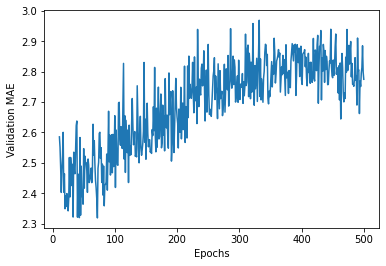

Epoch 1/80
26/26 [==============================] - 1s 4ms/step - loss: 505.5063 - mae: 20.3377
Epoch 2/80
26/26 [==============================] - 0s 4ms/step - loss: 350.3467 - mae: 16.1976
Epoch 3/80
26/26 [==============================] - 0s 4ms/step - loss: 183.5913 - mae: 11.1130
Epoch 4/80
26/26 [==============================] - 0s 4ms/step - loss: 75.2467 - mae: 6.5340
Epoch 5/80
26/26 [==============================] - 0s 4ms/step - loss: 41.5815 - mae: 4.7478
Epoch 6/80
26/26 [==============================] - 0s 4ms/step - loss: 29.4585 - mae: 3.9208
Epoch 7/80
26/26 [==============================] - 0s 4ms/step - loss: 23.9794 - mae: 3.4250
Epoch 8/80
26/26 [==============================] - 0s 4ms/step - loss: 21.2017 - mae: 3.2245
Epoch 9/80
26/26 [==============================] - 0s 4ms/step - loss: 19.0841 - mae: 3.0165
Epoch 10/80
26/26 [==============================] - 0s 4ms/step - loss: 17.3194 - mae: 2.8643
Epoch 11/80
26/26 [==============================] - 

In [18]:
for i in range(k):
    print('第几折：'+str(i))
    #验证集
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]

    #训练集
    x_train_data=np.concatenate([train_data[:i*num_val_samples],
                                 train_data[(i+1)*num_val_samples:]],axis=0)
    y_train_targers=np.concatenate([train_targets[:i*num_val_samples],
                                    train_targets[(i+1)*num_val_samples:]],axis=0)

    model=build_model()
    #verbose=0代表训练时用的是静默模式
    history=model.fit(x=x_train_data,
                      y=y_train_targers,
                      validation_data=(val_data,val_targets),
                      epochs=num_epochs,
                      batch_size=1,
                      verbose=1)

    #保存验证的平均绝对误差
    val_mae_history=history.history['val_mae']
    all_val_mae_histories.append(val_mae_history)

#计算所有轮次中K折验证分数的平均值
average_mae_history=[np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

#绘制验证分数 不要绘制前10个数据点
plt.plot(range(1+10,len(average_mae_history)+1),average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#从上面的k折交叉验证得到验证损失图像中得出最佳的训练批次是80次
#然后以这个次数训练得到最终的模型
#在所有数据上得到训练模型
model=build_model()
model.fit(x=train_data,
          y=train_targets,
          epochs=80,
          batch_size=16)

#在测试数据上评价
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print('test_mse_score:'+str(test_mse_score))
print('test_mae_score:'+str(test_mae_score))

#保存模型
MODEL_PATH = '/public/liujiawei/huawei/ZHB/ADF-master/models/'
model.save(MODEL_PATH+'house.h5')

In [ ]:
train_targets